# **Linear Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \\
```linear_regression``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

In [ ]:
import numpy as np # Librería mateamtica
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python

(80,)
(80,)


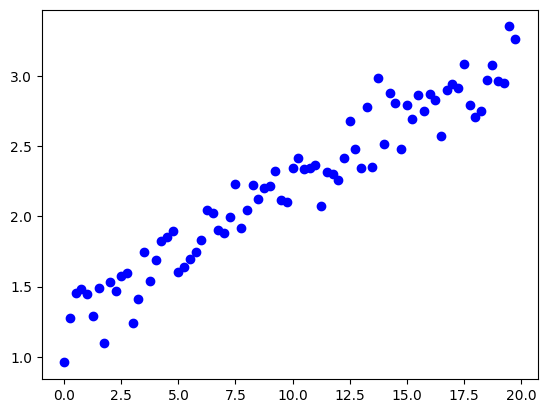

In [ ]:
def f(x) : # Recrear el comportamiento de una funcion lineal
  y = (0.0918 * x) + 1.2859 + 0.15*np.random.randn (x.shape[0]) # Comportamiento lineal (w*x + b + ruido)
  return y

# Crear datos de entrenamiento.
x = np.arange (0, 20, 0.25); print (x.shape)
# Generar etiquetas para cada x
y = f(x) ; print (y.shape)

# Diagrama de dispersion
plt.scatter(x, y, color = 'blue')

In [ ]:
# Instancia de la regresion lineal
linear_regression = LinearRegression()

# Entrenar el modelo de regresion lineal
linear_regression.fit( x.reshape([80,1]) , y ) # x = (#muestras, #caracteristicas)

LinearRegression()

In [ ]:
# Imprimir los valores estimados para compararlos respecto a los originales
print ("m = " + str(linear_regression.coef_) + ", b = " + str(linear_regression.intercept_))

m = [0.09482977], b = 1.2786621290087123


In [ ]:
# Nueva muestra. Imprime el valor correspondiente de y
new_sample = np.array([5])
print (f(new_sample))

# Predecir la nueva muestra. Imprimir la prediccion
prediction = linear_regression.predict( new_sample.reshape([1,1]) )
print (prediction)

[1.81838132]
[1.75281098]


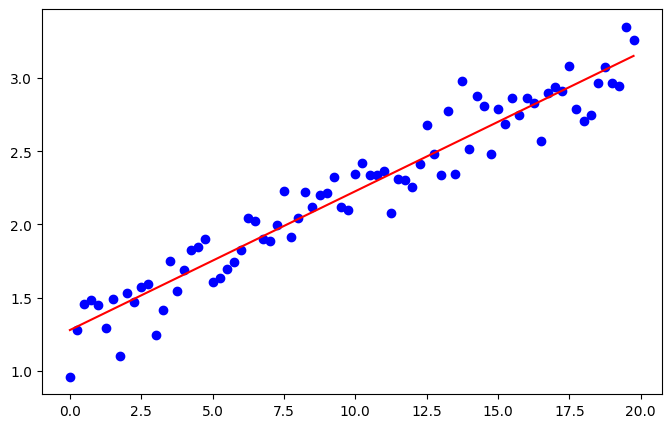

In [ ]:
# Predecir todos los valores de x
predictions = linear_regression.predict(x.reshape(-1, 1))

# Dibuja los valores del las muestras (azul) y de prediccion (rojo)
_, ax = plt.subplots (figsize=(8,5))
ax.scatter(x, y, color = 'blue')
ax.plot (x, predictions, color = 'red')

## In real data

```datasets``` module info [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # plots
from sklearn.linear_model import LinearRegression # scikit-learn: libreria de IA para python
from sklearn.datasets import load_diabetes

In [ ]:
# Cargar la base de datos Diabetes
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
print(diabetes_X.shape, diabetes_y.shape)

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, 2]
diabetes_X = diabetes_X[:, np.newaxis]
print(diabetes_X.shape, diabetes_y.shape)

In [ ]:
# Linear regression
linear_regression = LinearRegression()

# Train the model
linear_regression.fit( _ , _ )

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = linear_regression.predict( _ )


print ("w = " + str( _ ) + ", b = " + str( _ ))

In [ ]:
# Plot outputs
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( _ , _ , color="blue")
ax.plot( _ , _ , color="red")

# **Logistic Regresion**

Iris dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \\

```LogisticRegression``` module [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # Regresion logistica
from sklearn.datasets import load_iris # Iris dataset

In [10]:
iris = load_iris() # Cargar la base de datos iris
iris_x = iris.data[:, :2] # Caracteristicas. Seleccionamos 2
iris_y = iris.target # Etiquetas
iris_features = iris.feature_names[:2]
iris_targets = iris.target_names

# Imprimir formas
print (iris_x.shape, iris_y.shape, "\n", iris_features, iris_targets)

(150, 2) (150,) 
 ['sepal length (cm)', 'sepal width (cm)'] ['setosa' 'versicolor' 'virginica']


In [11]:
# Instancia de la regresion logistica
logistic_regression = LogisticRegression()

# Entrenar el modelo de regresion logistica
logistic_regression.fit ( iris_x , iris_y ) #(#muestras, #caracteristicas)

LogisticRegression()

### **Decision boundaries**

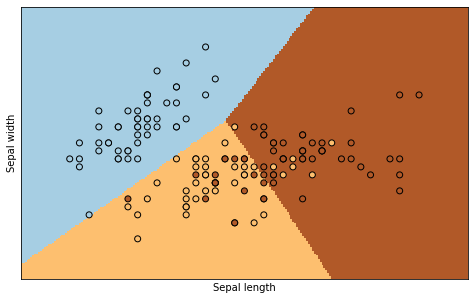

In [19]:
# Valores minimos y maximos para crear el grid de las fronteras de decision
h_min, h_max = iris_x[:, 0].min(), iris_x[:, 0].max()
v_min, v_max = iris_x[:, 1].min(), iris_x[:, 1].max()

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.arange(h_min-0.1, h_max+0.1, 0.01), np.arange(v_min-0.1, v_max+0.1, 0.01))

# Predecir los valores del grid
pred_samples = np.c_[h_grid.ravel(), v_grid.ravel()]
print (h_grid.shape, v_grid.shape, pred_samples.shape)

(260, 380) (260, 380) (98800, 2)


In [22]:
predictions = logistic_regression.predict(pred_samples)
print (predictions.shape)
predictions = predictions.reshape(h_grid.shape)
print (predictions.shape)

(98800,)
(260, 380)


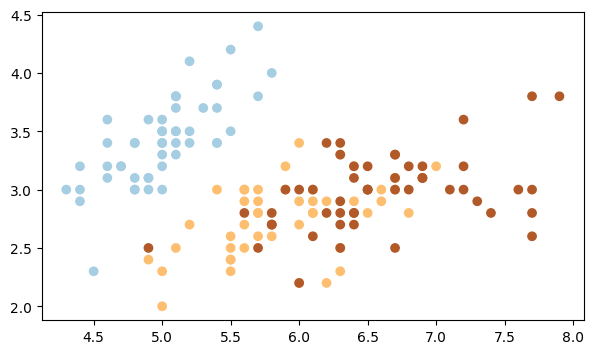

In [26]:
_, ax = plt.subplots(figsize=(7,4))
ax.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, cmap='Paired')

[]

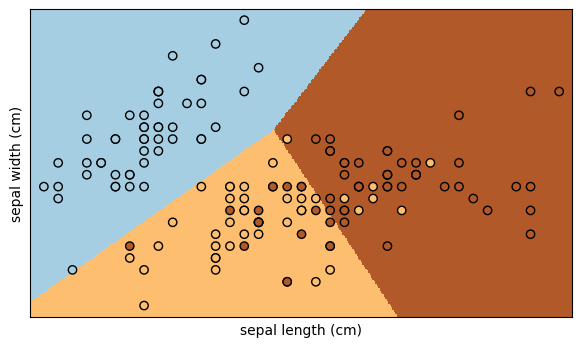

In [41]:
# # Encajar las predicciones al tamaño del grid
# predictions = predictions.reshape(x_grid.shape)

# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(7,4))
ax.pcolormesh(h_grid, v_grid, predictions, cmap = 'Paired')

# Imprimir las muestras con el scatter
ax.scatter ( iris_x[:, 0] , iris_x[:, 1] ,  c = iris_y , edgecolors='k', cmap='Paired')

ax.set_xlim(h_grid.min(), h_grid.max())
ax.set_ylim(v_grid.min(), v_grid.max())

ax.set_xlabel(iris_features[0])
ax.set_ylabel(iris_features[1])

ax.set_xticks(())
ax.set_yticks(())

# plt.legend([t for t in iris_targets])